In [1]:
%pip install numpy pandas matplotlib seaborn ipython jupyterlab tensorflow scikit-learn fastdtw tslearn


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\Alejo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np

o_player_sequences, _ = np.load("trajectories.npy",allow_pickle=True)

In [2]:
import tensorflow as tf


o_player_dense= []
for seq in o_player_sequences:
    new_seq = [np.array([x[0],x[1]]) for x in seq]
    o_player_dense.append(np.array(new_seq))
o_player_dense = np.array(o_player_dense,dtype=object)

padding_value = [0,0]
padded_o_seq = tf.keras.preprocessing.sequence.pad_sequences(o_player_dense,padding='post', value=padding_value, dtype='float32',maxlen = 90)


In [3]:
print(o_player_dense.shape)

(13276,)


In [4]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

K = 8
o_player_dense_transformed = to_time_series_dataset(padded_o_seq)
model = TimeSeriesKMeans(n_clusters=K, verbose=False, random_state=0,n_jobs=-1,init='random',metric="dtw")
model.fit(o_player_dense_transformed)


TimeSeriesKMeans(init='random', metric='dtw', n_clusters=8, n_jobs=-1,
                 random_state=0, verbose=False)

In [5]:
from tslearn.utils import to_time_series

cluster_centers = model.cluster_centers_
cluster_centers = to_time_series(cluster_centers)
cluster_centers.shape

(8, 90, 2)

In [6]:
from sklearn.metrics.pairwise import euclidean_distances


distances = model.transform(o_player_dense_transformed)
cluster_labels = model.predict(o_player_dense_transformed)

print(distances[0])
print(cluster_labels[0])
sequences_ordered = [[] for i in range(K)]
for i in range(len(distances)):
    closest_center = cluster_labels[i]
    distance = distances[i][closest_center]
    sequences_ordered[closest_center].append((distance,i))



for i in range(len(sequences_ordered)):
    lst = sequences_ordered[i]
    lst = sorted(lst)
    sequences_ordered[i] = lst




[42.34171745 22.52611566 11.36092551 40.37150653 43.15428957 24.13029905
 61.17271792 13.77758929]
2


In [7]:
print(len(sequences_ordered[0]))
print(len(sequences_ordered[1]))


1078
2728


In [11]:
np.save("sequences_ordered.npy", sequences_ordered)


Drawing out top 3 examples for cluster center 0
(6.087117678134032, 5480)


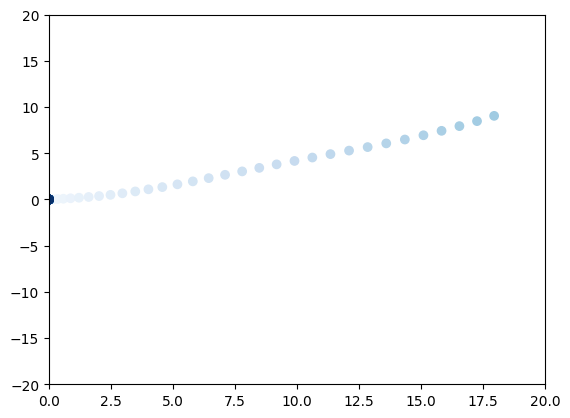

(6.204541274005916, 12012)


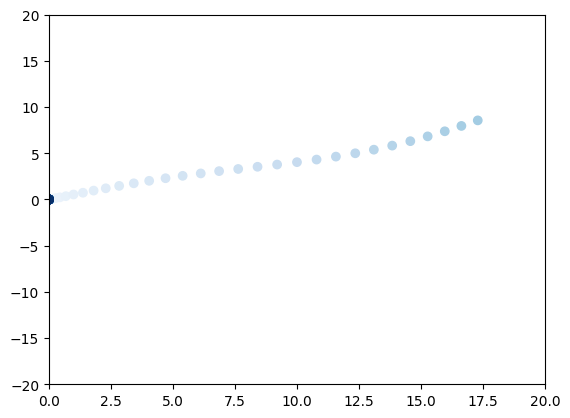

(6.277554795103901, 8328)


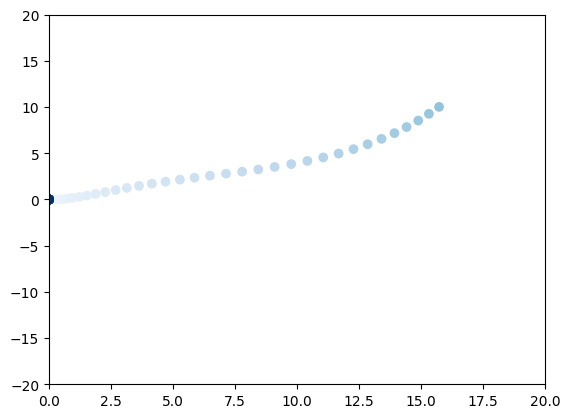

Drawing out top 3 examples for cluster center 1
(3.3874175255175105, 13112)


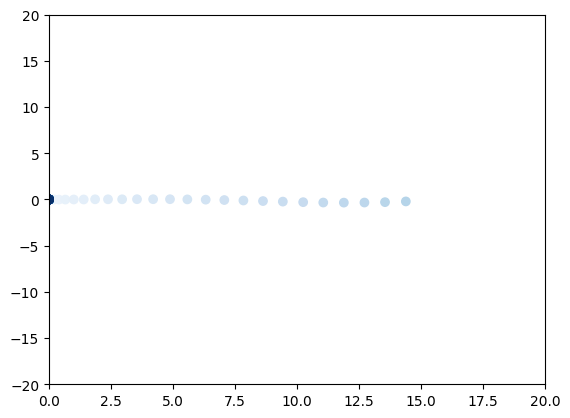

(3.451979856312026, 355)


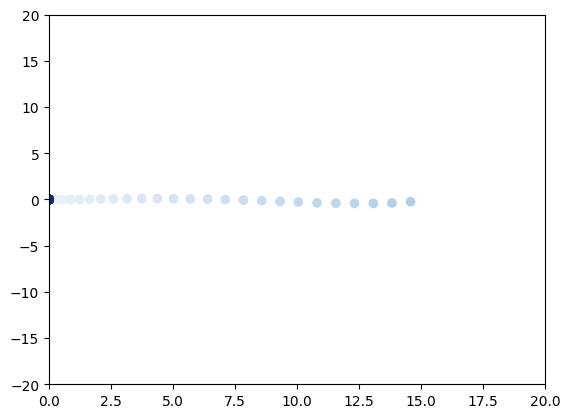

(3.462703696164181, 9294)


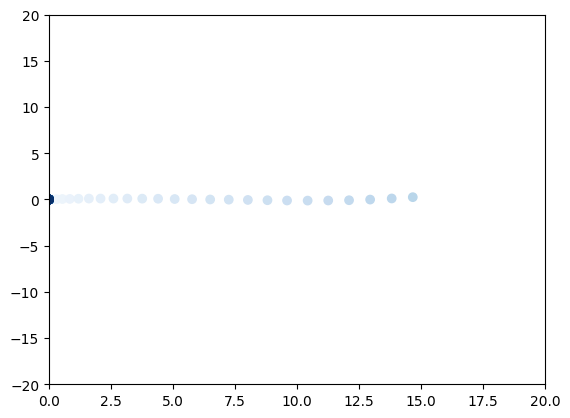

Drawing out top 3 examples for cluster center 2
(2.7696012611947323, 6990)


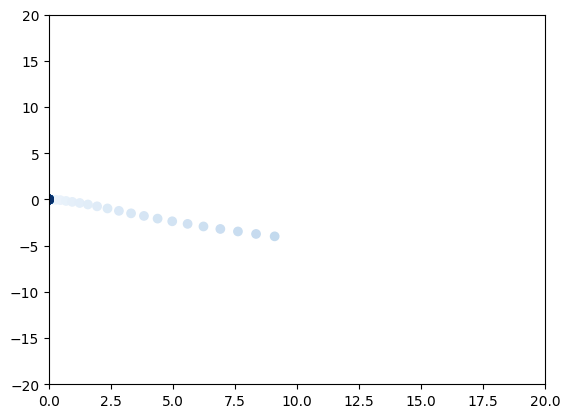

(2.7739394168154257, 756)


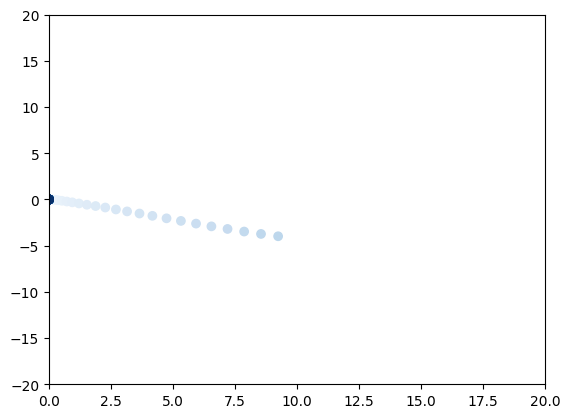

(2.7998303023757365, 5214)


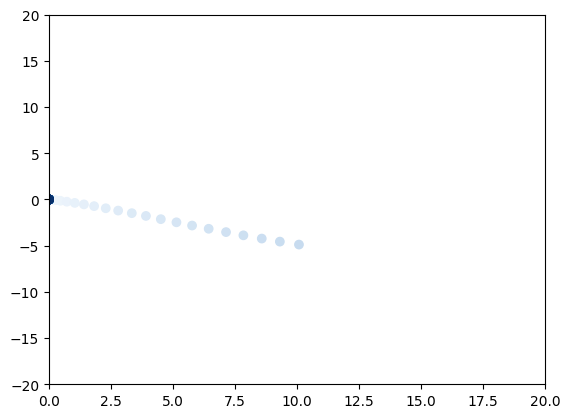

Drawing out top 3 examples for cluster center 3
(10.768461971146474, 12384)


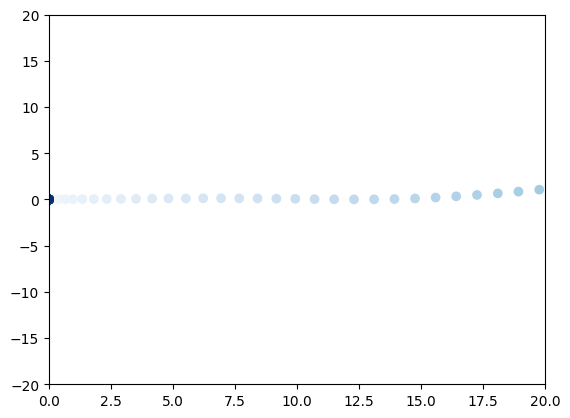

(10.770170748255243, 7117)


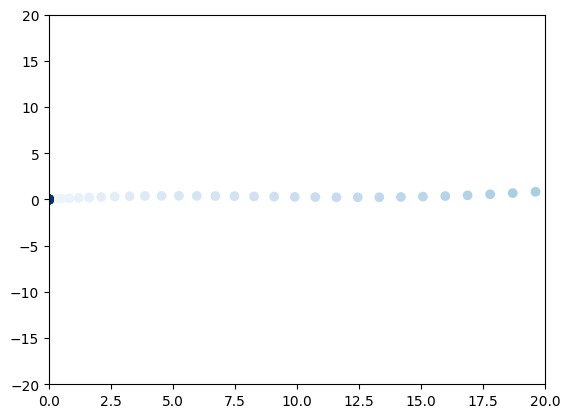

(10.84176321421403, 323)


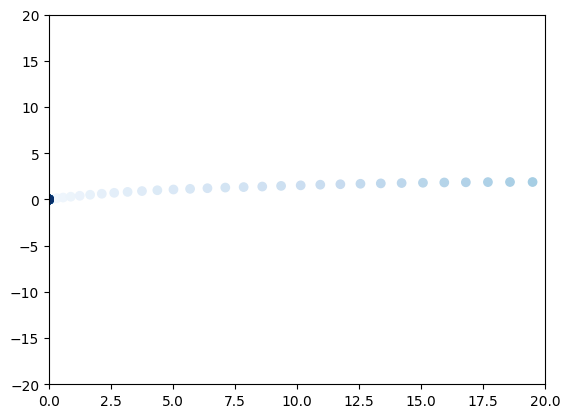

Drawing out top 3 examples for cluster center 4
(3.1118904102389826, 3336)


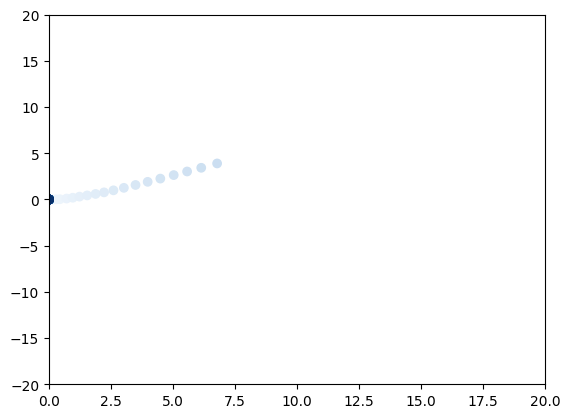

(3.144400486390955, 6314)


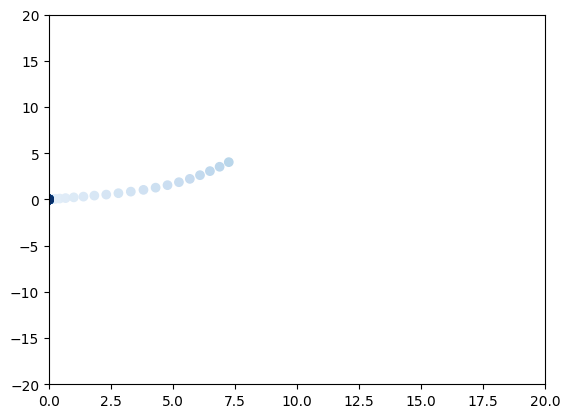

(3.222001602837448, 12571)


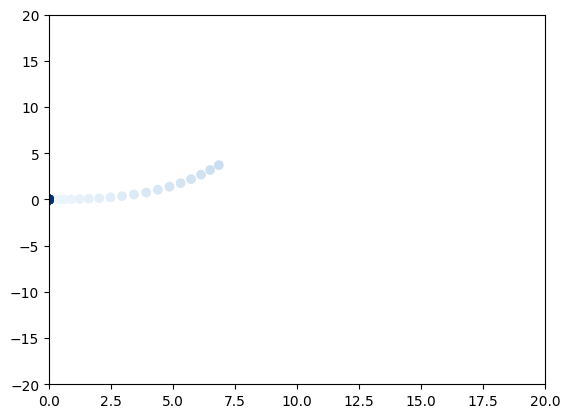

Drawing out top 3 examples for cluster center 5
(5.745908051332628, 5336)


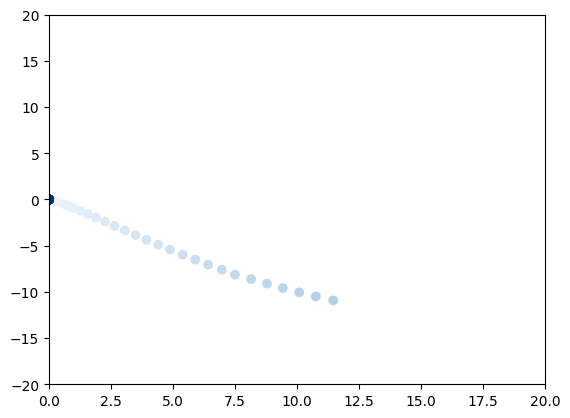

(5.7913344202514105, 6326)


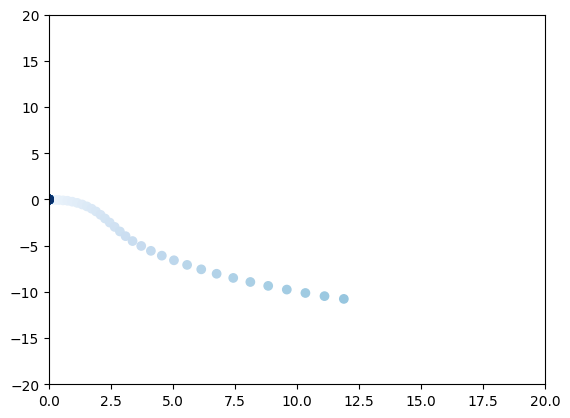

(5.854489957074232, 2188)


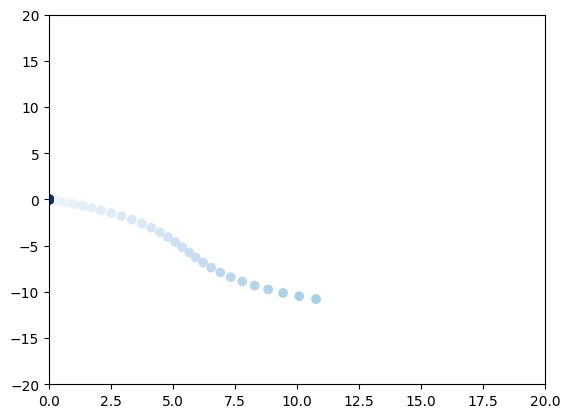

Drawing out top 3 examples for cluster center 6
(8.108943656435713, 2928)


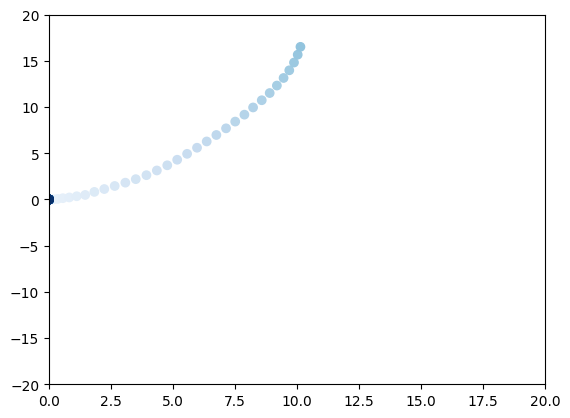

(8.297994704583685, 3229)


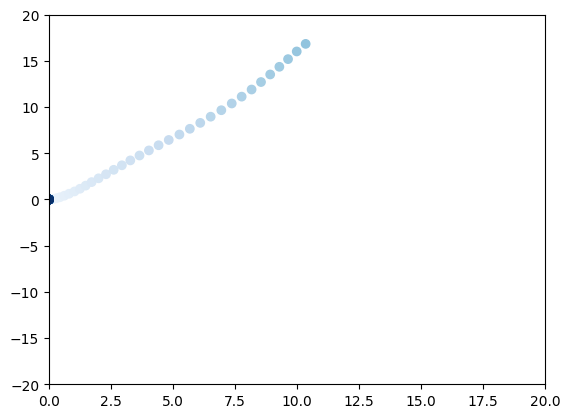

(8.358997689669174, 7378)


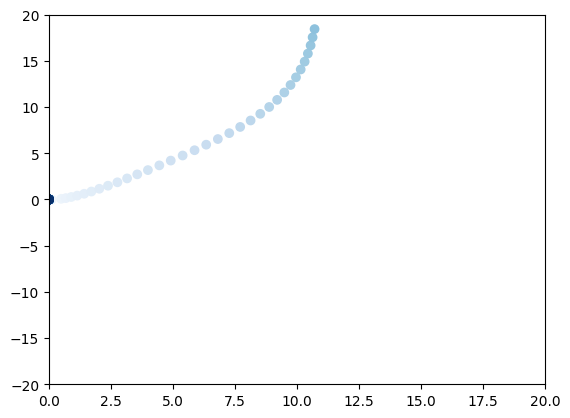

Drawing out top 3 examples for cluster center 7
(5.773616925825317, 7208)


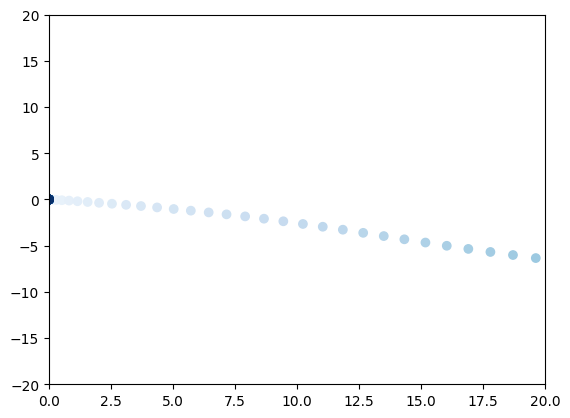

(5.779228933689999, 4926)


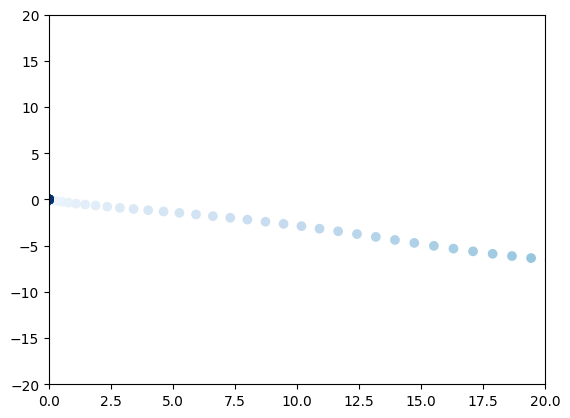

(5.805868062534504, 10776)


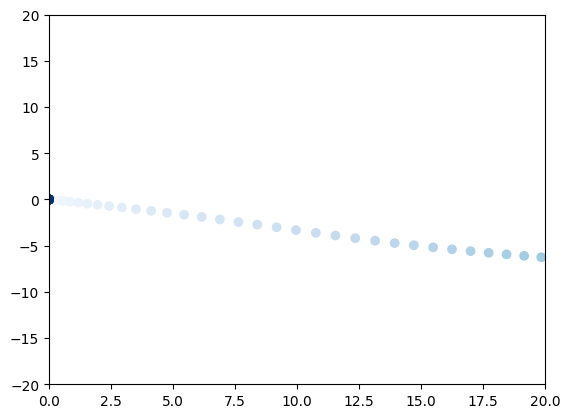

In [8]:
import matplotlib.pyplot as plt
for i in range(len(sequences_ordered)):
    print(f"Drawing out top 3 examples for cluster center {i}")
    cluster = sequences_ordered[i]
    for i in range(3):
        tup = cluster[i]
        print(tup)
        current_index = tup[1]
        seq = o_player_dense_transformed[current_index]
        x = [x[0] for x in seq]
        y = [x[1] for x in seq]
        c = np.linspace(0, 1, len(x))

        plt.scatter(x,y, c = c,cmap='Blues')
        plt.ylim(-20, 20)
        plt.xlim(0, 20)
        plt.show()